In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/rock_density_xray.csv')

In [3]:
df.columns = ['Signal', 'Density']

In [4]:
X = df.drop('Density', axis=1)
y = df['Density']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [6]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_preds = lr_model.predict(X_test)

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [8]:
mean_absolute_error(y_test, lr_preds)

0.211198973318633

In [11]:
np.sqrt(mean_squared_error(y_test, lr_preds))

0.2570051996584629

In [12]:
signal_range = np.arange(1, 100)

In [13]:
signal_preds = lr_model.predict(signal_range.reshape(-1, 1))

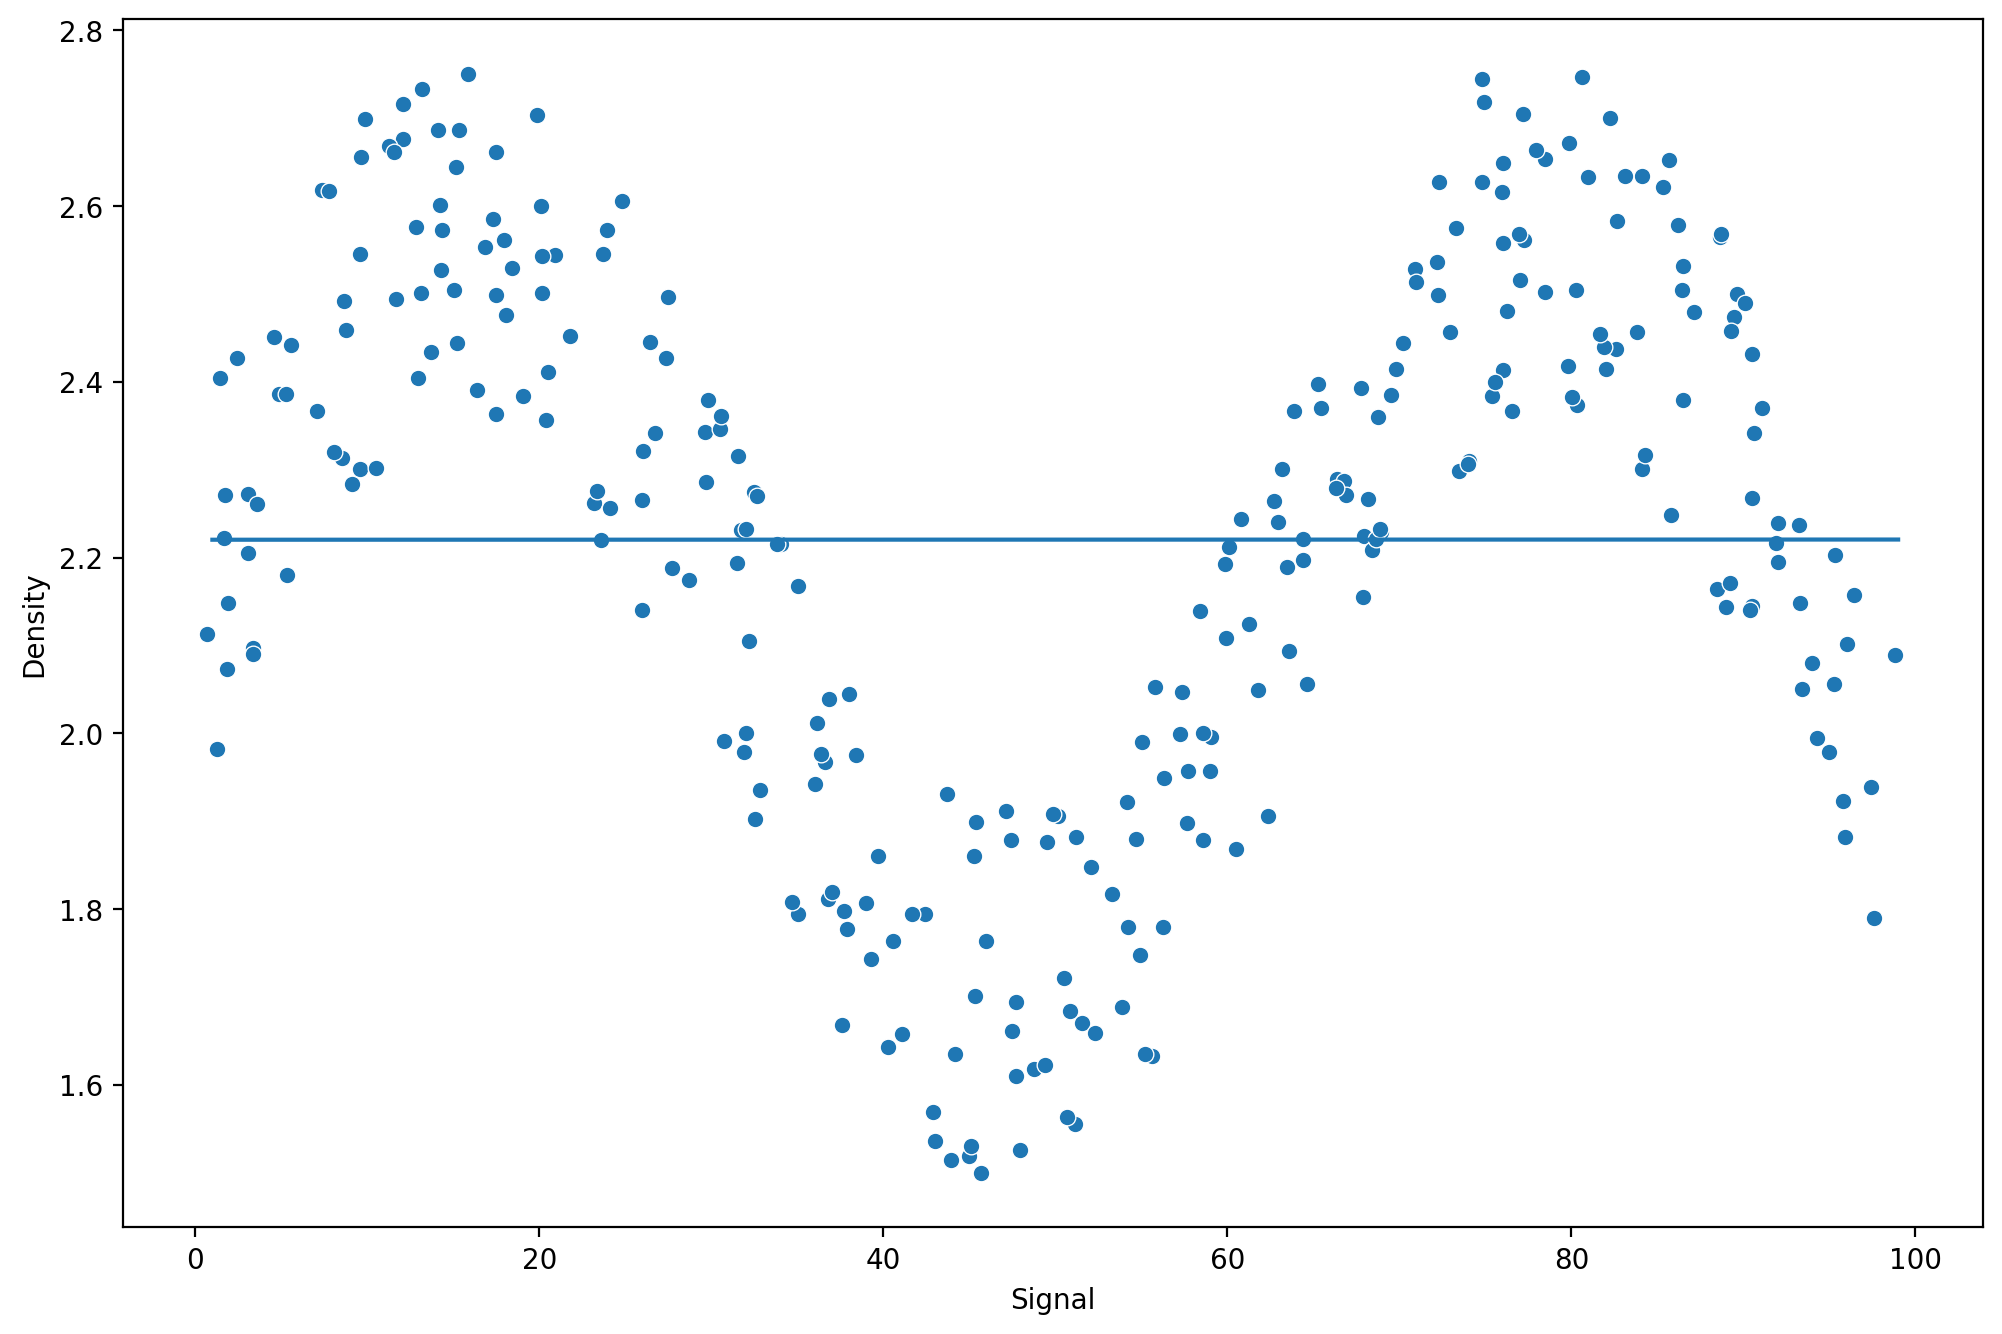

In [14]:
plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(x='Signal', y='Density', data=df)

plt.plot(signal_range, signal_preds)

In [15]:
def run_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print('RMSE: {}'.format(rmse))
    
    mae = mean_absolute_error(y_test, preds)
    print('MAE: {}'.format(mae))
    
    signal_range = np.arange(0, 100)
    signal_preds = model.predict(signal_range.reshape(-1, 1))
    
    plt.figure(figsize=(12, 8), dpi=200)
    sns.scatterplot(x='Signal', y='Density', data=df, color='black')

    plt.plot(signal_range, signal_preds)

RMSE: 0.2570051996584629
MAE: 0.211198973318633


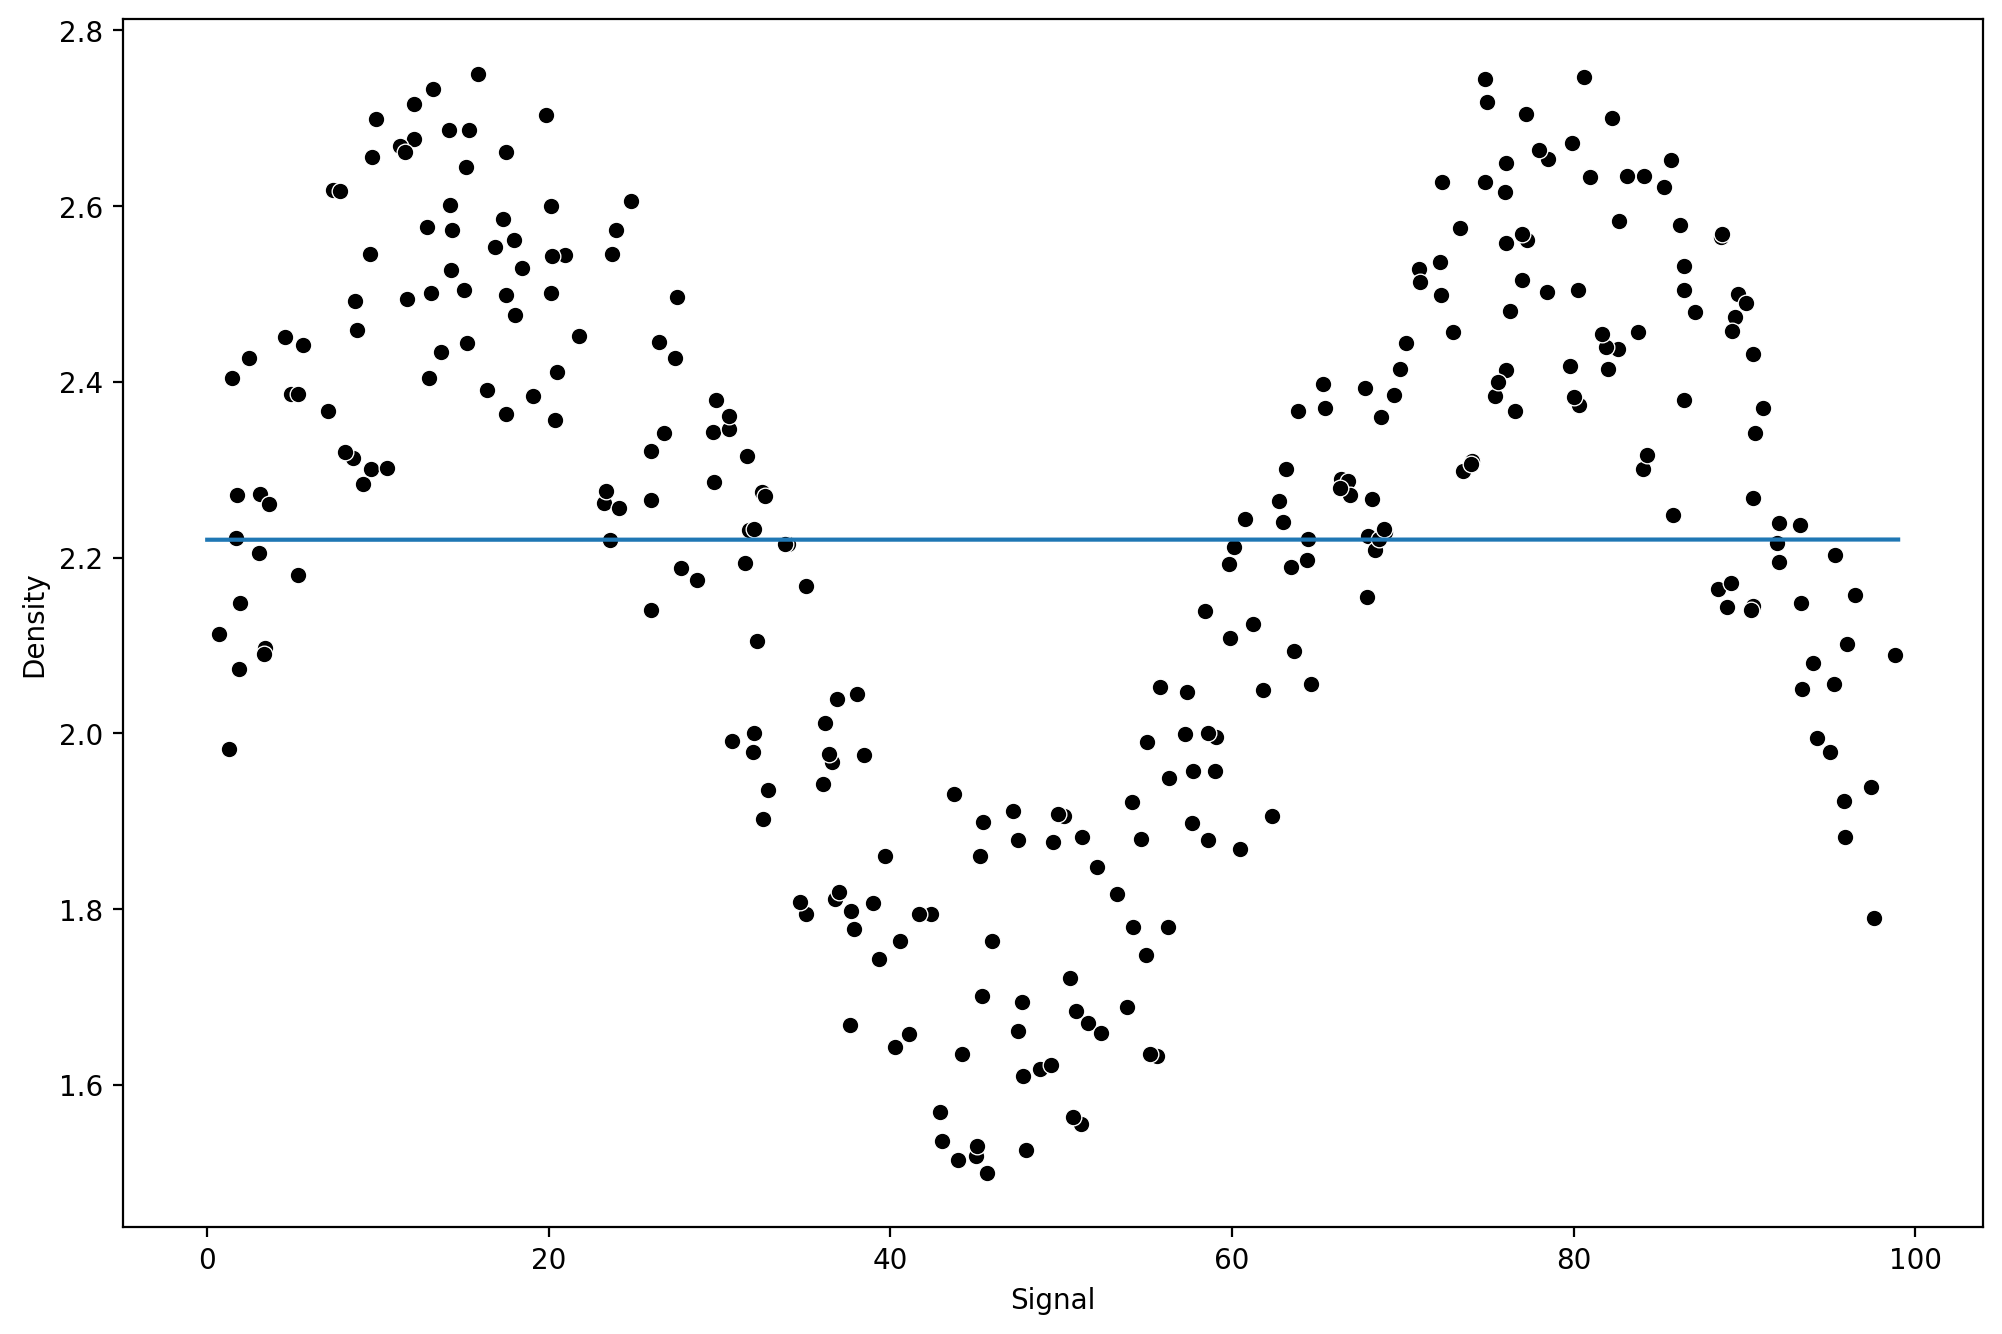

In [16]:
model = LinearRegression()
run_model(model, X_train, y_train, X_test, y_test)

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [36]:
pipe = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())

RMSE: 0.13807383449323551
MAE: 0.11969085253552043


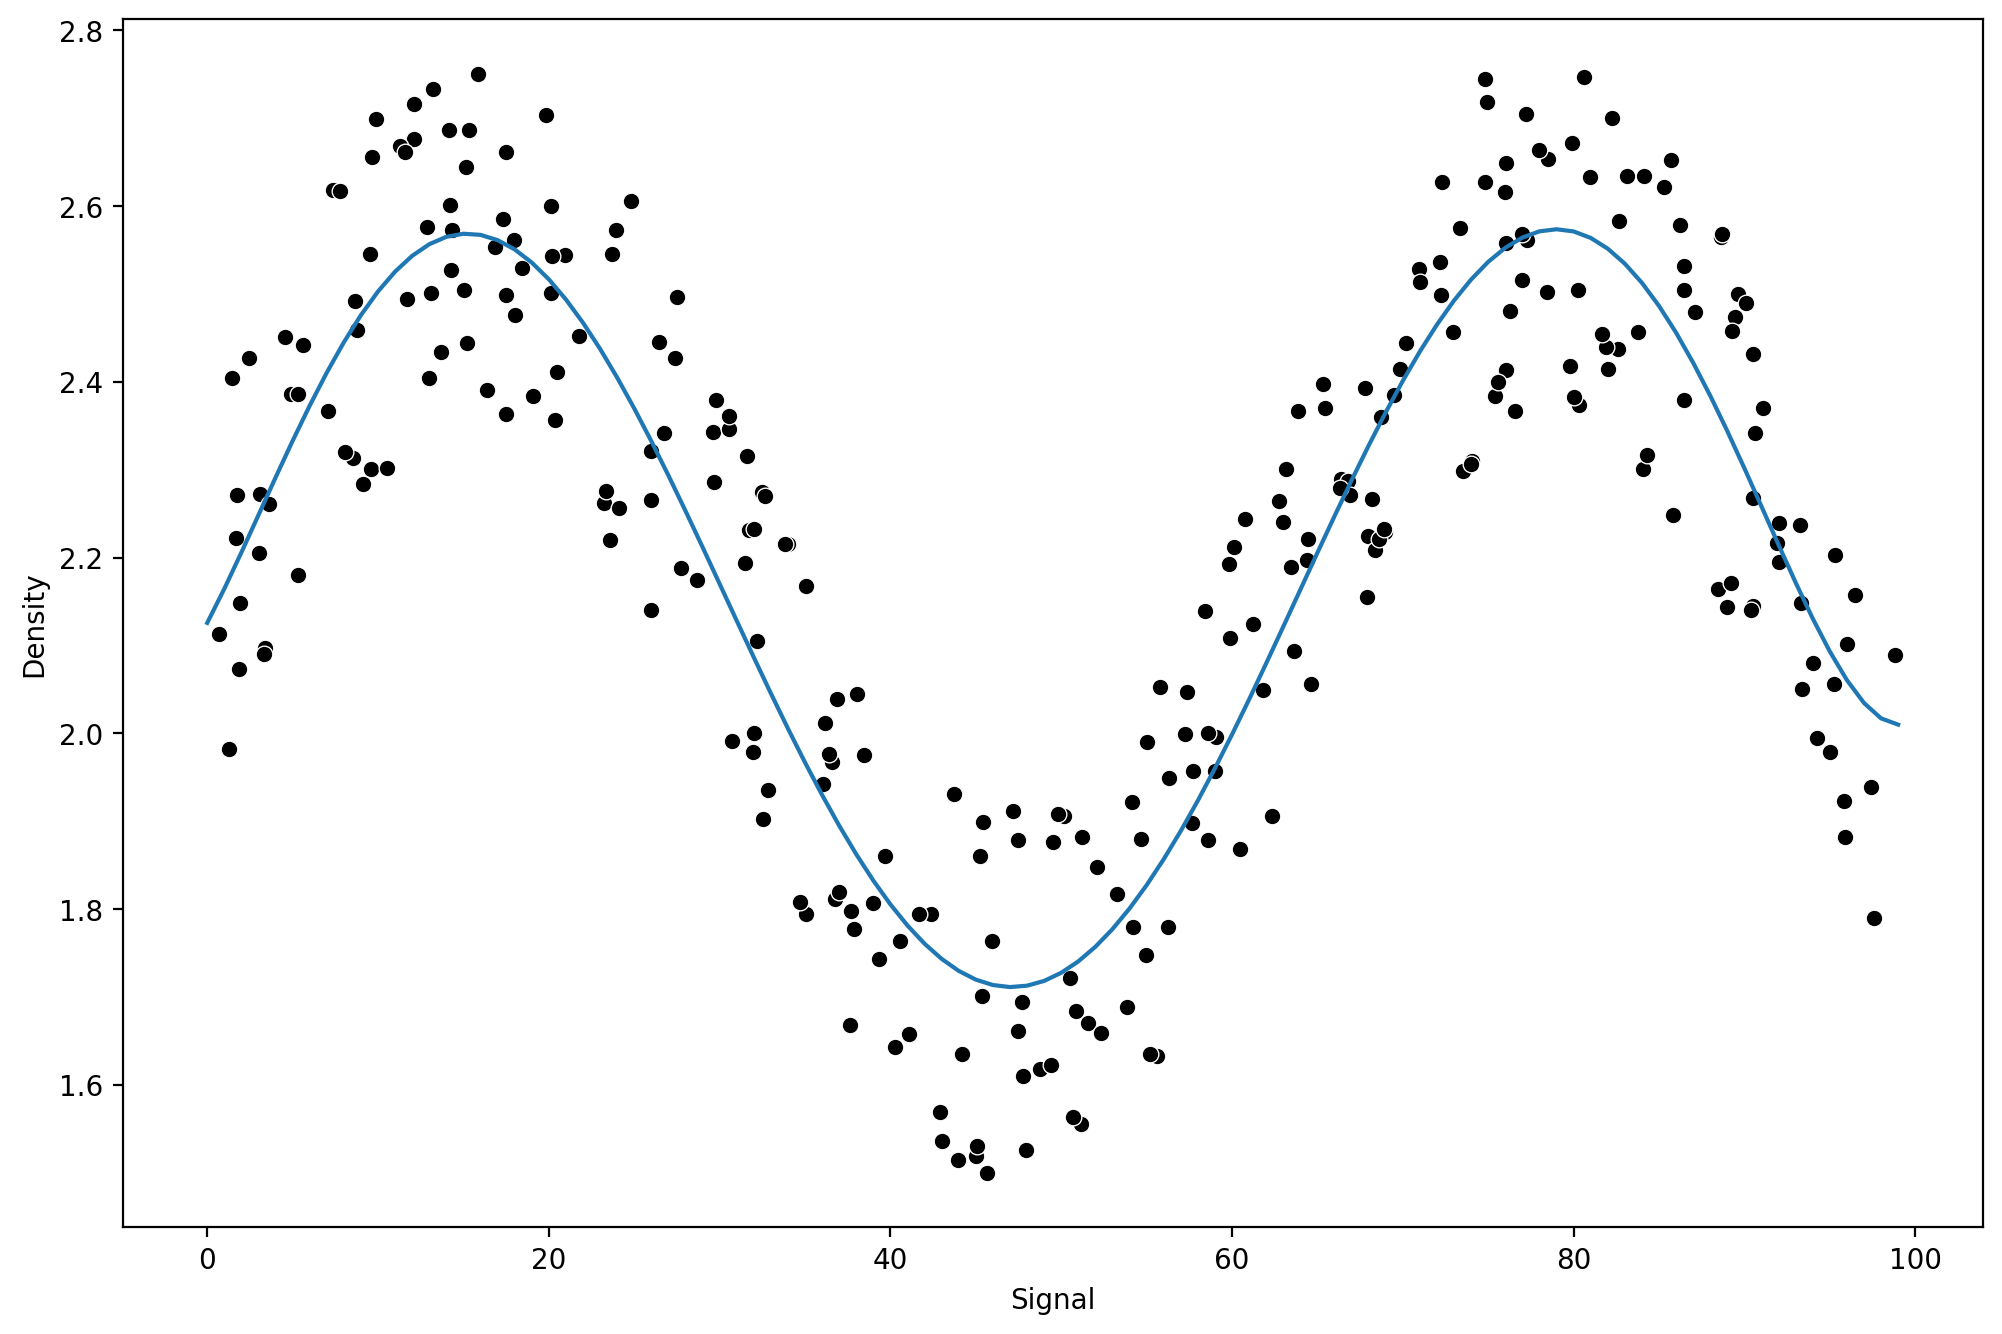

In [37]:
run_model(pipe, X_train, y_train, X_test, y_test)